# Imports

In [1]:
# DataFrame
import pandas as pd 

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Utility
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

c:\Users\mohamed mowina\anaconda3\envs\nngpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Read data

In [22]:
df = pd.read_csv('amazon_sample_05m.csv')
print(df.shape)

(500000, 4)


In [25]:
df = df.drop(['review_title', 'Unnamed: 0'], axis=1)

In [5]:
df.head()

,label,text
0,2,I bought this to wear as a joke to my brothers...
1,1,Note: Partially similar review of Vol 1.They s...
2,2,This book is a great YA read. Realistic & hear...
3,2,Well where to begin. I purchased the book and ...
4,1,"I have to say, I've purchased many books in my..."


In [6]:
# Check for null values after dropping
print(np.sum(df.isnull().any(axis=1)))

# Drop null values in the data frame
df = df.dropna()

0


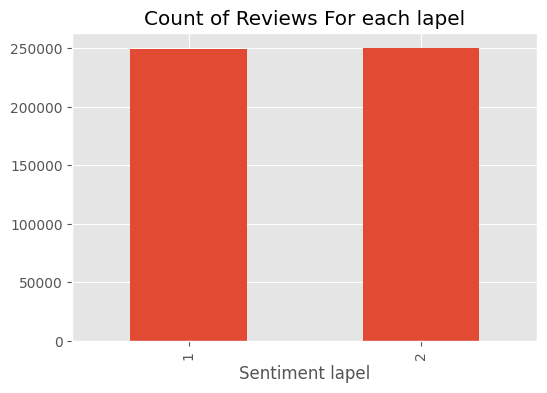

In [23]:
ax = df['label'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews For each lapel',
          figsize=(6, 4))
ax.set_xlabel('Sentiment lapel')
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   500000 non-null  int64 
 1   text    500000 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.6+ MB


In [9]:
# Check for null values after dropping
print(np.sum(df.isnull().any(axis=1)))

# Drop null values in the data frame
df = df.dropna()

0


In [11]:
df = df.drop('review_title', axis=1)

In [12]:
df.head()

,label,text
0,2,I'm reading a lot of reviews saying that this ...
1,2,This soundtrack is my favorite music of all ti...
2,2,I truly like this soundtrack and I enjoy video...
3,2,"If you've played the game, you know how divine..."
4,2,I am quite sure any of you actually taking the...


In [13]:
# Check for null values after dropping
print(np.sum(df.isnull().any(axis=1)))

# Drop null values in the data frame
df = df.dropna()

0


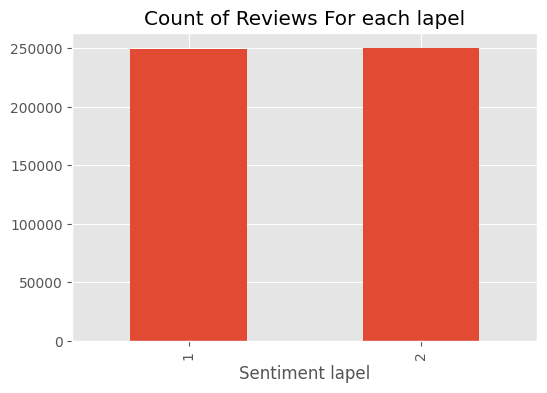

In [27]:
ax = df['label'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews For each lapel',
          figsize=(6, 4))
ax.set_xlabel('Sentiment lapel')
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599999 entries, 0 to 3599998
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   label   int64 
 1   text    object
dtypes: int64(1), object(1)
memory usage: 54.9+ MB


In [28]:
# Check for null values after dropping
print(np.sum(df.isnull().any(axis=1)))

# Drop null values in the data frame
df = df.dropna()

0


# Preproceccing

In [29]:
text = df['text'][50]
text

'I was really hoping that this would work well with my Motorola Rarz Maxx. I could hear the other person well, but others could barely understand me from their end. After much research at Plantronics, they said that this product will not function correctly with modern Smart Phones. Even though it has a 2.5 to 3.5 mm converter cord, the required voltage is not present with Smart Phones, whether they are iPhones, Droid OS, or other. They need USB voltage from a computer, for example. Call Plantronics and they will verify this. Plantronics is not making an appropriate 3.5 mm wired headset.I could not find a good quality Bluetooth headset until my recent purchase of the Plantronics Voyager Pro HD. It is not 100%, but amazingly good. It is available from Amazon.'

In [30]:
# Download the 'stopwords' resource
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\mohamed
[nltk_data]     mowina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
# Load stop words
stop_words = stopwords.words('english')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
  """Applies preprocessing steps to the given text."""
  # Lowercase text
  text = text.lower()

  # Remove numbers (optional)
  text = re.sub('[0-9]+', '', text)

  # Remove special characters, punctuation including %, ., and ,
  text = re.sub(r"[^\w\s!@#\$*\(\)_\+=\^:\\]", " ", text)  # Preserve negation words

  # Lemmatization (preferred)
  text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

  # Clean URLs
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)

  # Clean Emails
  text = re.sub('@[^\s]+', ' ', text)
  
  # Stop word removal (optional)
  text = ' '.join([word for word in text.split() if word not in stop_words])

  return text

In [32]:
# Load stop words
stop_words = stopwords.words('english')

# Sample text
text = df['text'][50]

# Preprocess the sample text
preprocessed_text = preprocess_text(text)
print("Preprocessed text:", preprocessed_text)

# Tokenize using BERT tokenizer (optional, replace with your desired tokenizer)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokens = tokenizer.tokenize(preprocessed_text)
print("BERT tokens:", tokens)

Preprocessed text: i wa realli hope that thi would work well with my motorola rarz maxx i could hear the other person well but other could bare understand me from their end after much research at plantron they said that thi product will not function correctli with modern smart phone even though it ha a to mm convert cord the requir voltag is not present with smart phone whether they are iphon droid os or other they need usb voltag from a comput for exampl call plantron and they will verifi thi plantron is not make an appropri mm wire headset i could not find a good qualiti bluetooth headset until my recent purchas of the plantron voyag pro hd it is not but amazingli good it is avail from amazon
BERT tokens: ['i', 'wa', 'real', '##li', 'hope', 'that', 'th', '##i', 'would', 'work', 'well', 'with', 'my', 'motorola', 'ra', '##rz', 'max', '##x', 'i', 'could', 'hear', 'the', 'other', 'person', 'well', 'but', 'other', 'could', 'bare', 'understand', 'me', 'from', 'their', 'end', 'after', 'much

In [33]:
df['text'] = df['text'].astype(str)

# Clean text
df['text'] = df['text'].apply(lambda text: preprocess_text(text))

# Tokenize the preprocessed text
df['tokens'] = df['text'].apply(lambda text: tokenizer.tokenize(text))

# Convert tokens to ids (vectorization)
df['input_ids'] = df['tokens'].apply(lambda tokenized_text: tokenizer.convert_tokens_to_ids(tokenized_text))
df.head()

,label,text,tokens,input_ids
0,2,i bought thi to wear as a joke to my brother n...,"[i, bought, th, ##i, to, wear, as, a, joke, to...","[1045, 4149, 16215, 2072, 2000, 4929, 2004, 10..."
1,1,note partial similar review of vol they should...,"[note, partial, similar, review, of, vol, they...","[3602, 7704, 2714, 3319, 1997, 5285, 2027, 232..."
2,2,thi book is a great ya read realist heart warm...,"[th, ##i, book, is, a, great, ya, read, real, ...","[16215, 2072, 2338, 2003, 1037, 2307, 8038, 31..."
3,2,well where to begin i purchas the book and rea...,"[well, where, to, begin, i, pu, ##rch, ##as, t...","[2092, 2073, 2000, 4088, 1045, 16405, 11140, 3..."
4,1,i have to say i ve purchas mani book in my tim...,"[i, have, to, say, i, ve, pu, ##rch, ##as, man...","[1045, 2031, 2000, 2360, 1045, 2310, 16405, 11..."


In [34]:
# Save to pickle file
df.to_pickle('amazon_t&i.pkl')

""" # Load from pickle file
loaded_df = pd.read_pickle('my_dataframe.pkl') """


" # Load from pickle file\nloaded_df = pd.read_pickle('my_dataframe.pkl') "

In [35]:
df.head()

,label,text,tokens,input_ids
0,2,i bought thi to wear as a joke to my brother n...,"[i, bought, th, ##i, to, wear, as, a, joke, to...","[1045, 4149, 16215, 2072, 2000, 4929, 2004, 10..."
1,1,note partial similar review of vol they should...,"[note, partial, similar, review, of, vol, they...","[3602, 7704, 2714, 3319, 1997, 5285, 2027, 232..."
2,2,thi book is a great ya read realist heart warm...,"[th, ##i, book, is, a, great, ya, read, real, ...","[16215, 2072, 2338, 2003, 1037, 2307, 8038, 31..."
3,2,well where to begin i purchas the book and rea...,"[well, where, to, begin, i, pu, ##rch, ##as, t...","[2092, 2073, 2000, 4088, 1045, 16405, 11140, 3..."
4,1,i have to say i ve purchas mani book in my tim...,"[i, have, to, say, i, ve, pu, ##rch, ##as, man...","[1045, 2031, 2000, 2360, 1045, 2310, 16405, 11..."


In [36]:
df_cleaned = df[['input_ids', 'label']]
df_cleaned.head()

,input_ids,label
0,"[1045, 4149, 16215, 2072, 2000, 4929, 2004, 10...",2
1,"[3602, 7704, 2714, 3319, 1997, 5285, 2027, 232...",1
2,"[16215, 2072, 2338, 2003, 1037, 2307, 8038, 31...",2
3,"[2092, 2073, 2000, 4088, 1045, 16405, 11140, 3...",2
4,"[1045, 2031, 2000, 2360, 1045, 2310, 16405, 11...",1


In [37]:
# Update labels in the 'label' column
df_cleaned['label'] = df_cleaned['label'].replace({1: 0, 2: 1})

C:\Users\mohamed mowina\AppData\Local\Temp\ipykernel_164140\4120486255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['label'] = df_cleaned['label'].replace({1: 0, 2: 1})


In [38]:
unique_labels = df_cleaned['label'].unique()
unique_labels

array([1, 0], dtype=int64)

In [39]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   input_ids  500000 non-null  object
 1   label      500000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.6+ MB


In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test_padded)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Build RNN model

In [40]:
# Imports
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [41]:
# Drop null values
df_cleaned.dropna(inplace=True)

# Check unique values in the 'label' column
unique_labels = df_cleaned['label'].unique()
print(unique_labels)

[1 0]


C:\Users\mohamed mowina\AppData\Local\Temp\ipykernel_164140\678795036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(inplace=True)


In [42]:
# Hyperparameters
max_len = 200
vocab_size = 50000
embedding_dim = 128
learning_rate = 0.001
dropout_rate = 0.5
num_lstm_units = 128
num_dense_units = 64

# Split data into train, validation, and test sets
X = df_cleaned['input_ids']
y = df_cleaned['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)


In [43]:
# Convert input data to numpy arrays and pad sequences
X_train_padded = pad_sequences(X_train.values, maxlen=max_len)
X_val_padded = pad_sequences(X_val.values, maxlen=max_len)
X_test_padded = pad_sequences(X_test.values, maxlen=max_len)

## Model #2

In [44]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Model definition
model2 = Sequential()

# Embedding layer
model2.add(Embedding(vocab_size, embedding_dim, input_length=max_len))

# LSTM layer
model2.add(LSTM(num_lstm_units, dropout=dropout_rate))

# Dense layers
model2.add(Dense(num_dense_units, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# Compile model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Model checkpoint to save the best model
model_checkpoint = ModelCheckpoint(filepath='amazon_sample_model2.h5', monitor='val_loss', save_best_only=True)

# Train the model
hist = model2.fit(X_train_padded, y_train, epochs=20, batch_size=32, validation_data=(X_val_padded, y_val),
                     callbacks=[early_stopping, model_checkpoint])


Epoch 1/20
14063/14063 [==============================] - 463s 32ms/step - loss: 0.2900 - accuracy: 0.8792 - val_loss: 0.2279 - val_accuracy: 0.9077
Epoch 2/20
14063/14063 [==============================] - 425s 30ms/step - loss: 0.2175 - accuracy: 0.9134 - val_loss: 0.2091 - val_accuracy: 0.9155
Epoch 3/20
14063/14063 [==============================] - 425s 30ms/step - loss: 0.1924 - accuracy: 0.9242 - val_loss: 0.2015 - val_accuracy: 0.9205
Epoch 4/20
14063/14063 [==============================] - 420s 30ms/step - loss: 0.1762 - accuracy: 0.9319 - val_loss: 0.1948 - val_accuracy: 0.9231
Epoch 5/20
14063/14063 [==============================] - 423s 30ms/step - loss: 0.1649 - accuracy: 0.9366 - val_loss: 0.1986 - val_accuracy: 0.9240
Epoch 6/20
14063/14063 [==============================] - 420s 30ms/step - loss: 0.1573 - accuracy: 0.9399 - val_loss: 0.2063 - val_accuracy: 0.9234
Epoch 7/20
14063/14063 [==============================] - 424s 30ms/step - loss: 0.1510 - accuracy: 0.9428

In [45]:
# Evaluate the model on test data
test_loss, test_accuracy = model2.evaluate(X_test_padded, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

3125/3125 [==============================] - 40s 13ms/step - loss: 0.1676 - accuracy: 0.9357
Test Loss: 0.16764774918556213
Test Accuracy: 0.935699999332428


In [46]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          6400000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,539,905
Trainable params: 6,539,905
Non-trainable params: 0
_________________________________________________________________


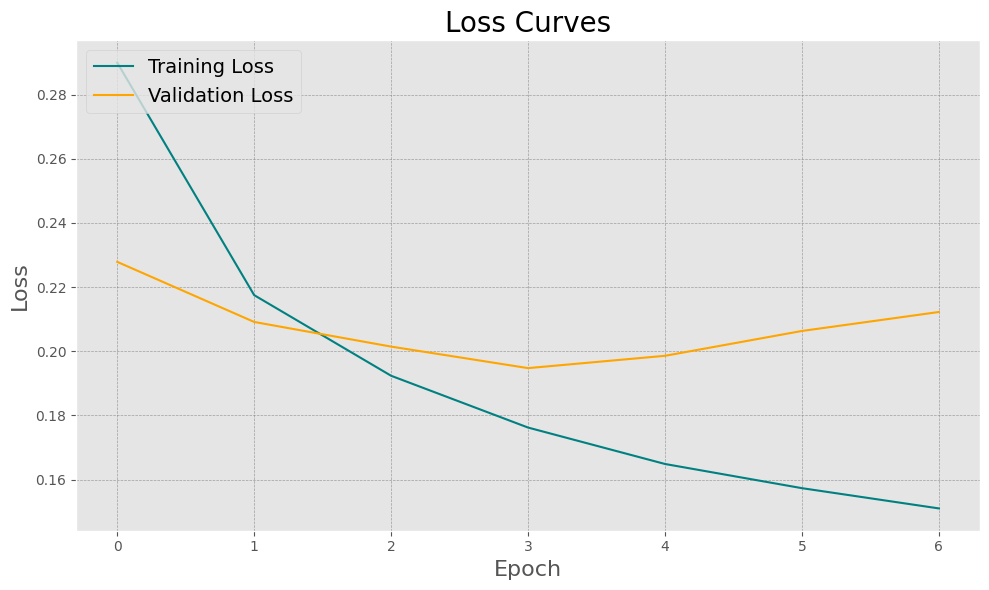

In [47]:
# Create the figure and plot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed
ax.plot(hist.history['loss'], color='teal', label='Training Loss')  # Rename labels
ax.plot(hist.history['val_loss'], color='orange', label='Validation Loss')

# Customize plot elements
ax.set_title('Loss Curves', fontsize=20)
ax.set_xlabel('Epoch', fontsize=16)
ax.set_ylabel('Loss', fontsize=16)
ax.legend(loc='upper left', fontsize=14)
ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)  # Add grid lines

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [ ]:
model_Evaluate(model2)

## Implemintaion

In [53]:
from tensorflow.keras.models import load_model

# Path to your h5 model file
model_path = 'amazon_sample_model2.h5'

# Load the model
model = load_model(model_path)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [54]:
def predict_sentiment(text, model = model, tokenizer = tokenizer, max_len = max_len):
  """Predicts sentiment for a given text using the provided model and tokenizer.

  Args:
      text: The text to predict sentiment for (string).
      model: The trained sentiment analysis model.
      tokenizer: The tokenizer used to preprocess the text.
      max_len: The maximum sequence length for the model (integer).

  Returns:
      A tuple containing:
          - predicted_sentiment: The predicted sentiment score (float).
          - sentiment_label: The sentiment label based on a threshold (string).
  """

  # Preprocess the text
  preprocessed_text = preprocess_text(text)  # Replace with your preprocessing function

  # Tokenize the text
  tokens = tokenizer.tokenize(preprocessed_text, padding='max_length', truncation=True)

  # Convert tokens to IDs
  input_ids = tokenizer.convert_tokens_to_ids(tokens)

  # Pad the sequence (if model requires it)
  padded_input = pad_sequences([input_ids], maxlen=max_len)

  # Make the prediction
  predicted_sentiment = model.predict(padded_input)[0][0]  # Assuming single output

  # Define a threshold for sentiment classification (optional)
  threshold = 0.5  # Adjust threshold based on your model's output range

  sentiment_label = 'Positive' if predicted_sentiment > threshold else 'Negative'

  return predicted_sentiment, sentiment_label



In [57]:
ex_text = input('Text:')

In [58]:
#ex_text = "The first one I bought was defective. The DVD didn't work at all. I purchased it from Electronics Express and when I contacted them they were wonderful. They gave me an RMA number right away, Fedex picked it up the next day and a new one arrived 1 week later. This one is just fine. I really love the clarity of the picture. My only complaint is that in DVD mode, the sound isn't loud enough. I have it in my RV and with the A/C running, I can barely hear it. I solved the problem by running an audio out jack from the TV to the input on the RV stereo speaker system. It's very lightweight and easy to move around and store. A bonus for the RV. The remote isn't great, but it works just fine and the video/audio jacks and antenna input are easy to get to as is the DVD player. All in all, it's a great deal for the price."
predict_sentiment(ex_text)

Keyword arguments {'padding': 'max_length', 'truncation': True} not recognized.


1/1 [==============================] - 0s 39ms/step


(0.017015614, 'Negative')